In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression,LinearRegression

In [59]:
df=pd.read_csv('C:/Users/vaibh/Downloads/placement (1).csv')

In [60]:
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [61]:
df.shape

(1000, 3)

In [62]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

C:\Users\vaibh\AppData\Local\Temp\ipykernel_12664\1173423251.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\vaibh\AppData\Local\Temp\ipykernel_12664\1173423251.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


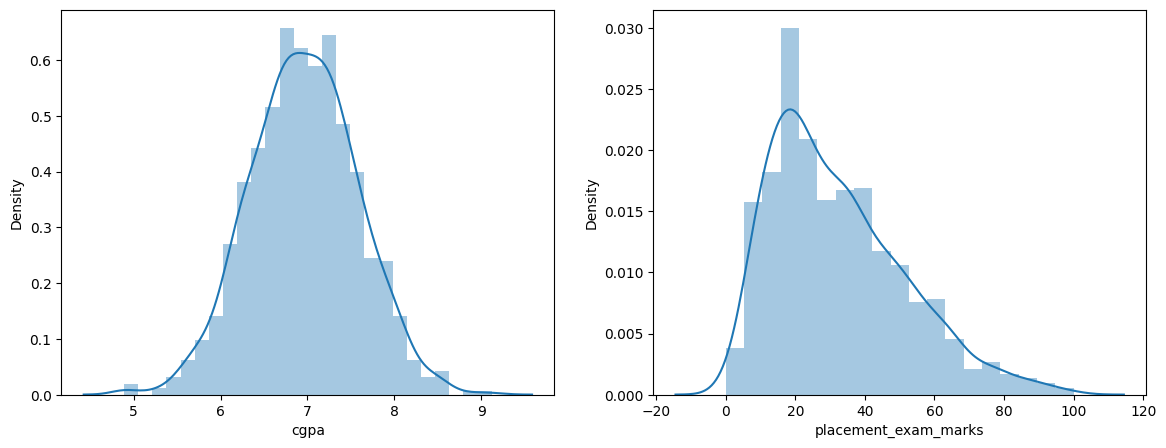

In [9]:
plt.figure(figsize=((14,5)))

plt.subplot(121)

sns.distplot(df['cgpa'])

plt.subplot(122)

sns.distplot(df['placement_exam_marks'])
plt.show()

In [67]:
x=df.drop(columns=['placed'])

y=df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)








In [68]:
lr=LogisticRegression()

lr.fit(x_train,y_train)


y_predict=lr.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.5066666666666667

In [16]:
print('the mean value of cgpa is ',df['cgpa'].mean())
print('the std deviation of cgpa is',df['cgpa'].std())

print('the min value of cgpa is',df['cgpa'].min())
print('the max value of cgpa is ',df['cgpa'].max())

the mean value of cgpa is  6.96124
the std deviation of cgpa is 0.6158978751323896
the min value of cgpa is 4.89
the max value of cgpa is  9.12


In [17]:
(df['cgpa'].mean()) - 3*(df['cgpa'].std())

5.113546374602832

In [18]:
# find the boundary values

In [20]:
print('highest boundary allowed',(df['cgpa'].mean()) + 3*(df['cgpa'].std()))

print('lowest boundary allowed',(df['cgpa'].mean()) - 3*(df['cgpa'].std()))

highest boundary allowed 8.808933625397168
lowest boundary allowed 5.113546374602832


In [21]:
# find the outliers 

In [24]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.1)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [25]:
# trimming : it is a technique where we remove the complete outliers fro  the data

In [27]:
new_df=df[(df['cgpa']<8.80 )& (df['cgpa'] > 5.1)]

In [28]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [69]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [70]:
x=new_df.drop(columns=['placed'])

y=new_df.iloc[:,-1]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)

In [73]:
# intialize the model with
lr=LogisticRegression()

# fit the model on trainin data set 
lr.fit(x_train,y_train)

# predictt the model using test data

y_predict1=lr.predict(x_test) 

accuracy_score(y_test,y_predict1)

0.5183946488294314

In [74]:
# yes accuracy_score is increase by removing the outliers   

In [75]:
# method 2 
# find the zcore by   this formula xi= xi-u/deviation

In [79]:
df['cgpa_zcore']= ((df['cgpa']) - (df['cgpa'].mean()))/df['cgpa'].std()

In [85]:
df[df['cgpa_zcore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zcore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [87]:
df[df['cgpa_zcore']< -3]

,cgpa,placement_exam_marks,placed,cgpa_zcore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [91]:
df[(df['cgpa_zcore']>3 ) | (df['cgpa_zcore']< -3)]

,cgpa,placement_exam_marks,placed,cgpa_zcore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [92]:
n_df=df[(df['cgpa_zcore']<3 ) & (df['cgpa_zcore'] >-3)]

In [93]:
# trimming   
n_df

,cgpa,placement_exam_marks,placed,cgpa_zcore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [94]:
# capping : is a technique where we handle the oulier by upper limit and lower limit  

In [95]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [99]:
df['cgpa']=np.where(
    
    df['cgpa']> upper_limit,
    upper_limit,
    
    np.where(
        
        df['cgpa'] < lower_limit,
        
        lower_limit,
        df['cgpa']
    )
)

In [104]:
df.shape

(1000, 4)

In [107]:
df=df[['cgpa','placement_exam_marks',	'placed']]

In [108]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [111]:
x=df.drop(columns=['placed'])
y=df.iloc[:,-1]

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3,random_state=2)

In [114]:
# intialize the model 
lr=LogisticRegression()


lr.fit(x_train,y_train)

y_predict2=lr.predict(x_test)

accuracy_score(y_test,y_predict2)

0.5033333333333333